## Multiple time series on common axes

For this exercise, you will construct a plot showing four time series stocks on the same axes. 

The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. You'll generate a single plot showing all the time series on common axes with a legend.

In [50]:
#init
import pandas as pd
import numpy as np

path = "K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_14_Plot\\"
stocks = pd.read_csv(path+'stocks.csv',index_col=0,parse_dates=True)

aapl = stocks['AAPL']
ibm = stocks['IBM']
csco = stocks['CSCO']
msft = stocks['MSFT']




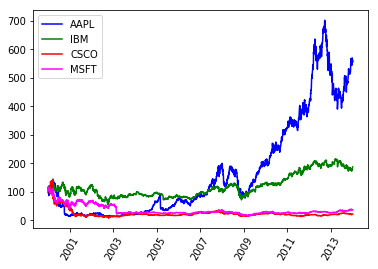

In [3]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')


# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()


## Multiple time series slices (1)
You can easily slice subsets corresponding to different time intervals from a time series. In particular, you can use strings like '2001:2005', '2011-03:2011-12', or '2010-04-19:2010-04-30' to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels (and other pandas Series & DataFrames by labels), the slice includes the right-most portion of the slice. That is, extracting my_time_series['1990':'1995'] extracts data from my_time_series corresponding to 1990, 1991, 1992, 1993, 1994, and 1995 inclusive.
You can use partial strings or datetime objects for indexing and slicing from time series.
For this exercise, you will use time series slicing to plot the time series aapl over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×12×1 grid of subplot


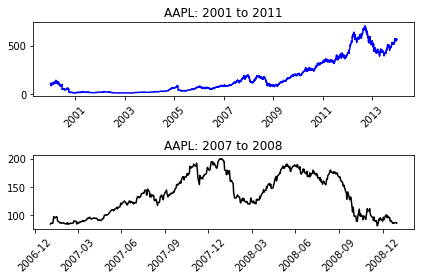

In [4]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


## Multiple time series slices (2)
In this exercise, you will use the same time series aapl from the previous exercise and plot tighter views of the data.

Partial string indexing works without slicing as well. For instance, using my_time_series['1995'], my_time_series['1999-05'], and my_time_series['2000-11-04'] respectively extracts views of the time series my_time_series corresponding to the entire year 1995, the entire month May 1999, and the entire day November 4, 2000.

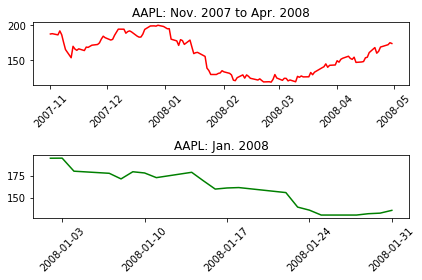

In [5]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view,color='red')

# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.plot(view,color='green')
plt.title('AAPL: Jan. 2008')


# Improve spacing and display the plot
plt.tight_layout()
plt.show()


## Plotting an inset view
Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly using plt.axes(). In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).

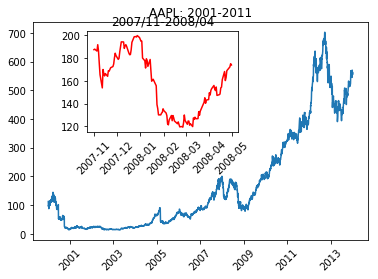

In [10]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()


#Plotting moving averages
In this exercise, you will plot pre-computed moving averages of AAPL stock prices in distinct subplots.

The time series aapl is overlayed in black in each subplot for comparison.
The time series mean_30, mean_75, mean_125, and mean_250 have been computed for you (containing the windowed averages of the series aapl computed over windows of width 30 days, 75 days, 125 days, and 250 days respectively).

In [31]:
#init mean_30, mean_75, mean_125, and mean_250
mean_30 = aapl.rolling(window=30,center=False).mean()
mean_75 = aapl.rolling(window=75, center=False).mean()
mean_125 = aapl.rolling(window=125, center=False).mean()
mean_250 = aapl.rolling(window=250, center=False).mean()





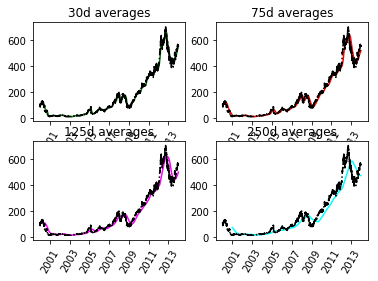

In [33]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125,color='magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250,color='cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()


## Plotting moving standard deviations
Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.
The time series std_30, std_75, stdn_125, & std_250 have been computed for you (containing the windowed standard deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

In [38]:
std_30 = aapl.rolling(window=30,center=False).std()
std_75 = aapl.rolling(window=75, center=False).std()
std_125 = aapl.rolling(window=125, center=False).std()
std_250 = aapl.rolling(window=250, center=False).std()


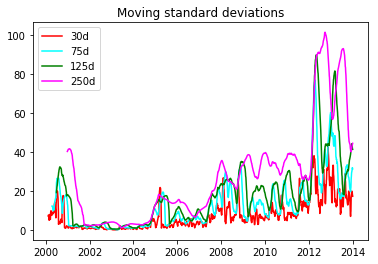

In [39]:
# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75,color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125,color='green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250,color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()


## (Sharp the picture to get more features)Extracting a histogram from a grayscale image
For grayscale images, various image processing algorithms use an image histogram. Recall that an image is a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load an unequalized low contrast image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.


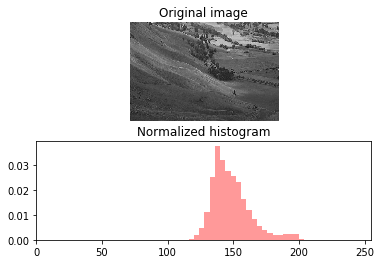

In [44]:
# Load the image into an array: image
image = plt.imread(path + '640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image,cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, color='red', alpha=0.4, range=(0, 256), normed=True)

# Display the plot
plt.show()


## Cumulative Distribution Function from an image histogram
A histogram of a continuous random variable is sometimes called a Probability Distribution Function (or PDF). The area under a PDF (a definite integral) is called a Cumulative Distribution Function (or CDF). The CDF quantifies the probability of observing certain pixel intensities.

Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). This time, the 2D array image will be pre-loaded and pre-flattened into the 1D array pixels for you.

The histogram option cumulative=True permits viewing the CDF instead of the PDF.
Notice that plt.grid('off') switches off distracting grid lines.
The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

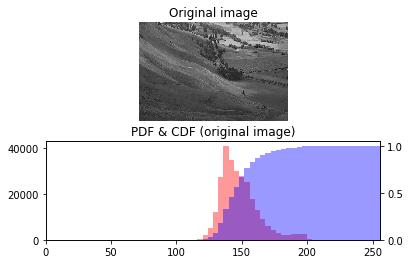

In [47]:
# Load the image into an array: image
image = plt.imread(path+'640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)

plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx() #overlay plots

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()



## Equalizing an image histogram

Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its PDF and CDF.

The arrays image and pixels are extracted for you in advance.
The CDF of the original image is computed using plt.hist().
Notice an array new_pixels is created for you that interpolates new pixel values using the original image CDF.

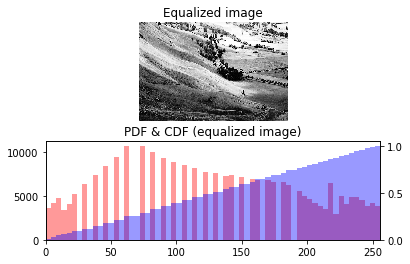

In [51]:
# Load the image into an array: image
image = plt.imread(path+'640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx() #overlay plots
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()


## Extracting histograms from a color image
This exercise resembles the last in that you will plot histograms from an image. This time, you will use a color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

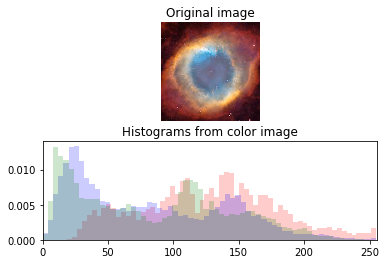

In [54]:
# Load the image into an array: image
image = plt.imread(path+'hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels,bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()


## Extracting bivariate histograms from a color image
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

For this final exercise, you will use the same color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional arrays red_pixels, green_pixels, & blue_pixels respectively.


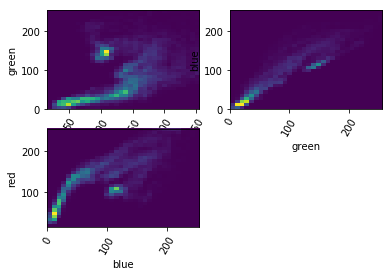

In [57]:
# Load the image into an array: image
image = plt.imread(path+'hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
# Generate a 2-D histogram
#Make a 2-D histogram in the top left subplot showing the joint variation of red_pixels (on the x-axis) and green_pixels (on the y-axis). Use bins=(32,32) to control binning.
plt.hist2d(red_pixels,green_pixels ,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels,bins=(32,32))# Generate a 2-D histogram



# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels,bins=(32,32))# Generate a 2-D histogram

# Display the plot
plt.show()
